In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv("E:\ML\DataSets\heart_failure_clinical_records_dataset.csv")
df.dropna()
#df.info()
y = df.DEATH_EVENT
X = df.drop("DEATH_EVENT",axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
#X_train.describe()
#y_train.head()

In [2]:
co_rel=df.corr()
co_rel["DEATH_EVENT"].sort_values(ascending = False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [3]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, y)
#mi_scores.sort()
mi_scores = pd.Series(mi_scores, name= "Mi Scores" ,index=X.columns)
mi_scores.sort_values(ascending = False)

mi_scores

age                         0.069487
anaemia                     0.000000
creatinine_phosphokinase    0.016917
diabetes                    0.000000
ejection_fraction           0.063359
high_blood_pressure         0.081732
platelets                   0.000000
serum_creatinine            0.079886
serum_sodium                0.000000
sex                         0.000000
smoking                     0.000000
time                        0.245368
Name: Mi Scores, dtype: float64

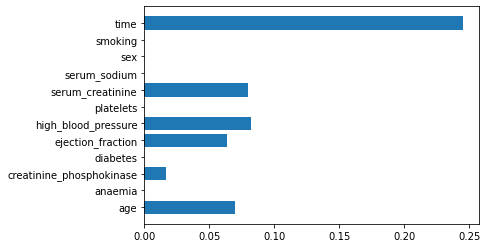

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_theme(style= "darkgrid")

#sns.jointplot(y=df["smoking"], x=df["DEATH_EVENT"] ,kind="kde")


mi_scores.sort_values(ascending = True)
plt.barh(np.arange(len(mi_scores)), mi_scores)
plt.yticks(np.arange(len(mi_scores)), list(mi_scores.index))

plt.show()

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:


#features = ["time", "age", "serum_creatinine", "ejection_fraction", "serum_sodium", "high_blood_pressure", ]
features = [ 'time', "serum_creatinine", "ejection_fraction", "creatinine_phosphokinase", "high_blood_pressure", ]
#features = [ 'serum_creatinine', 'age', 'high_blood_pressure', 'anaemia', 'creatinine_phosphokinase']

X_train_upd = X_train[features]
X_train_upd.head()
X_test_up = X_test[features]

In [7]:
from sklearn.pipeline import Pipeline
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier ## worst precision and f1-score; best recall highly unstable


my_pipeline = Pipeline( steps = [
    ( 'model', LogisticRegression(random_state=42))
])



In [8]:
my_pipeline.fit(X_train_upd, y_train)

Pipeline(steps=[('model', LogisticRegression(random_state=42))])

In [9]:
predictions = my_pipeline.predict(X_test_up)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(predictions, y_test)
precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = f1_score(predictions, y_test)

print ('accuracy ', accuracy*100, '%')
print('precision ' , precision)
print ( 'recall ', recall)
print ( 'f1 ', f1)

accuracy  76.0 %
precision  0.5806451612903226
recall  0.782608695652174
f1  0.6666666666666667
